In [202]:
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np
from csv import DictReader

In [203]:
hashtag_stance_df = pd.read_csv("indiv_final_stance_hashtag.csv")
hashtag_stance = hashtag_stance_df["stance"]
stance_df = pd.read_csv("indiv_final_stance_word.csv")
stance = stance_df["stance"]

In [204]:
info_df = pd.read_csv('indiv_strength_diversity_word.csv')
info_df["stance"] = stance
info_df.head()

,account_name,predict_class,prochoice_strength,prolife_strength,follower of,prolife proportion,prochoice proportion,prolife cnt,prochoice cnt,total cnt,stance
0,ABabysRights,1,0.097176,0.902824,1,1.0,0.0,12,0,12,-0.800551
1,ABGYNservices,0,0.782035,0.217965,-1,0.0,1.0,0,9,9,0.319771
2,Abigailschumach,0,0.662554,0.337446,1,1.0,0.0,13,0,13,0.247186
3,Alboteaparty,0,0.685805,0.314195,1,1.0,0.0,7,0,7,0.239477
4,alexdelong_,0,0.657739,0.342261,1,1.0,0.0,1,0,1,0.249455


In [205]:
info_hashtag_df = pd.read_csv('indiv_strength_diversity_hashtag.csv')
info_hashtag_df['stance'] = hashtag_stance
info_hashtag_df.head()

,account_name,predict_class,prochoice_strength,prolife_strength,follower of,prolife proportion,prochoice proportion,prolife cnt,prochoice cnt,total cnt,stance
0,ABabysRights,1,0.096149,0.903851,1,1.0,0.0,12,0,12,-0.859407
1,ABGYNservices,0,0.681977,0.318023,-1,0.0,1.0,0,9,9,0.181977
2,Abigailschumach,1,0.287463,0.712537,1,1.0,0.0,13,0,13,-0.607886
3,Alboteaparty,0,0.562099,0.437901,1,1.0,0.0,7,0,7,-0.419209
4,alexdelong_,1,0.138402,0.861598,1,1.0,0.0,1,0,1,-0.861598


$follower\_of$ column is marked as -1 if the account is a follower of prochoice account, 1 if the account is a follower of prolife account, 0 if both. The stance is in the range [-1, 1], 1 = prochoice, -1 = prolife.

In [206]:
diff = [info_hashtag_df['stance'][i]>0 and info_df['stance'][i]<0 for i in range(0, len(info_hashtag_df['stance']))]
np.sum(diff)

6

In [207]:
diff_2 = [info_hashtag_df['stance'][i]<0 and info_df['stance'][i]>0 for i in range(0, len(info_hashtag_df['stance']))]
np.sum(diff_2)

69

In order to examine the diversity, we would like to look at the individuals who have at least 5 followings out of 80 groups we have. The `info_hashtag_df_5` and `info_df_5` holds the output of the filtering.

In [208]:
info_df_5 = info_df.loc[info_df['total cnt'] >= 5]
info_hashtag_df_5 = info_hashtag_df.loc[info_hashtag_df['total cnt'] >= 5]

In [209]:
info_df_5.to_csv("indiv_info_ls_5.csv", sep=",", index=False)
info_hashtag_df_5.to_csv("indiv_info_hashtag_ls_5.csv", sep=",", index=False)

---
#  "prochoice_strength", "prolife_strength" and the "follower of" 

We will examinate the relationship from the dataframe with result calculated by using different set of words in tweets (hashtag or bag of word).

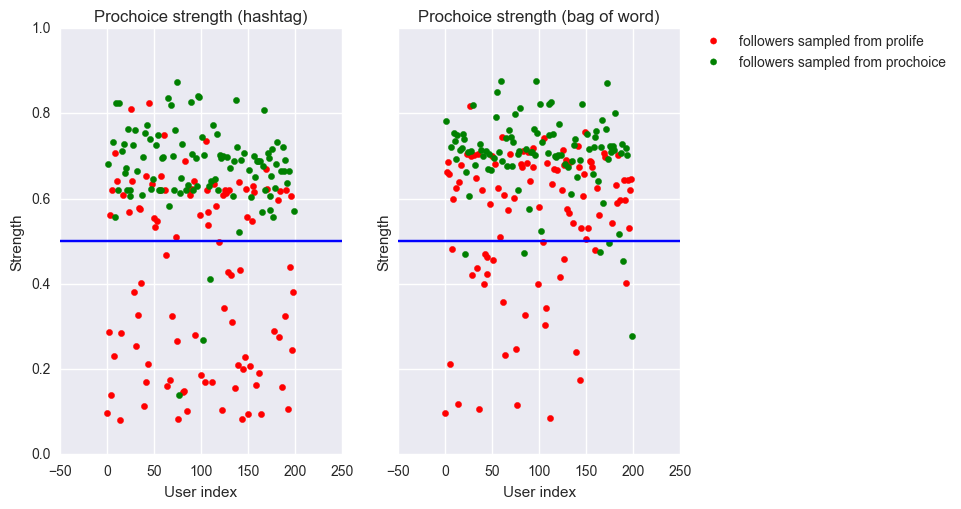

In [210]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(x=info_hashtag_df[info_hashtag_df['follower of']==1].index, 
            y=info_hashtag_df.loc[info_hashtag_df['follower of']==1, 'prochoice_strength'],
            color='r', label='followers sampled from prolife')
ax1.scatter(x=info_hashtag_df[info_hashtag_df['follower of']==-1].index, 
            y=info_hashtag_df.loc[info_hashtag_df['follower of']==-1, 'prochoice_strength'],
            color='g', label='followers sampled from prochoice')
ax1.axhline(y=0.5)
ax1.set_title("Prochoice strength (hashtag)")
ax1.set_xlabel("User index")
ax1.set_ylabel("Strength")

ax2.scatter(x=info_df[info_df['follower of']==1].index, 
            y=info_df.loc[info_df['follower of']==1, 'prochoice_strength'],
            color='r', label='followers sampled from prolife')
ax2.scatter(x=info_df[info_df['follower of']==-1].index, 
            y=info_df.loc[info_df['follower of']==-1, 'prochoice_strength'],
            color='g', label='followers sampled from prochoice')
ax2.axhline(y=0.5)
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax2.set_title("Prochoice strength (bag of word)")
ax2.set_xlabel("User index")
ax2.set_ylabel("Strength")
plt.show()

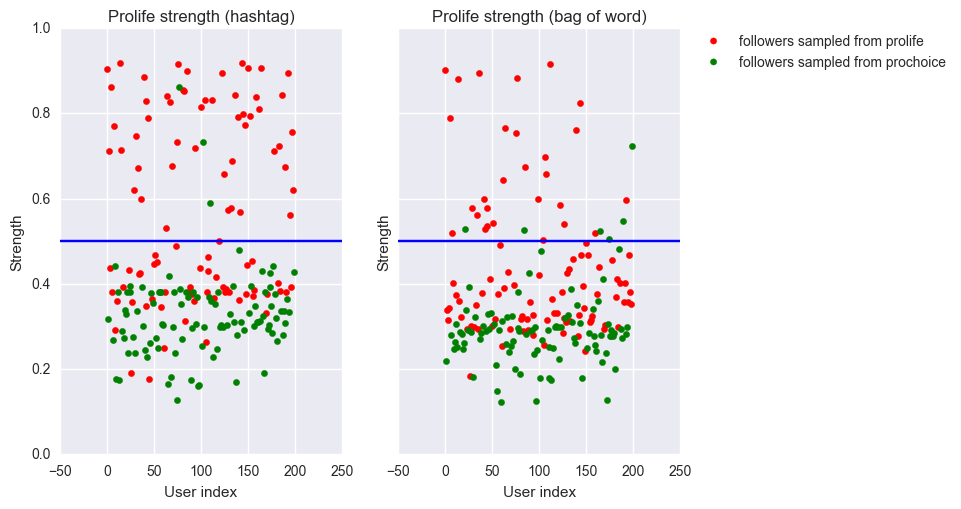

In [211]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(x=info_hashtag_df[info_hashtag_df['follower of']==1].index, 
            y=info_hashtag_df.loc[info_hashtag_df['follower of']==1, 'prolife_strength'],
            color='r', label='followers sampled from prolife')
ax1.scatter(x=info_hashtag_df[info_hashtag_df['follower of']==-1].index, 
            y=info_hashtag_df.loc[info_hashtag_df['follower of']==-1, 'prolife_strength'],
            color='g', label='followers sampled from prochoice')
ax1.axhline(y=0.5)
ax1.set_title("Prolife strength (hashtag)")
ax1.set_xlabel("User index")
ax1.set_ylabel("Strength")

ax2.scatter(x=info_df[info_df['follower of']==1].index, 
            y=info_df.loc[info_df['follower of']==1, 'prolife_strength'],
            color='r', label='followers sampled from prolife')
ax2.scatter(x=info_df[info_df['follower of']==-1].index, 
            y=info_df.loc[info_df['follower of']==-1, 'prolife_strength'],
            color='g', label='followers sampled from prochoice')
ax2.axhline(y=0.5)
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax2.set_title("Prolife strength (bag of word)")
ax2.set_xlabel("User index")
ax2.set_ylabel("Strength")
plt.show()

---
# "stance" vs the "follower of" 

Stance is in the range [-1, 1], -1 means extremely prolife, 1 means extremely prochoice


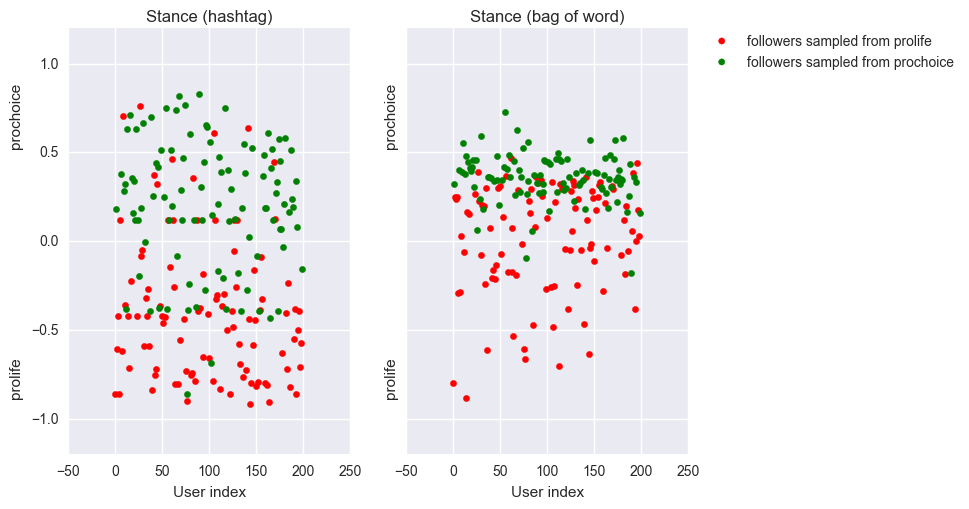

In [212]:
print("Stance is in the range [-1, 1], -1 means extremely prolife, 1 means extremely prochoice")

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(x=info_hashtag_df[info_hashtag_df['follower of']==1].index, 
            y=info_hashtag_df.loc[info_hashtag_df['follower of']==1, 'stance'],
            color='r', label='followers sampled from prolife')
ax1.scatter(x=info_hashtag_df[info_hashtag_df['follower of']==-1].index, 
            y=info_hashtag_df.loc[info_hashtag_df['follower of']==-1, 'stance'],
            color='g', label='followers sampled from prochoice')
ax1.set_title("Stance (hashtag)")
ax1.set_xlabel("User index")
ax1.set_ylim([-1.2, 1.2])
ax1.set_ylabel("prolife                                                 prochoice")

ax2.scatter(x=info_df[info_df['follower of']==1].index, 
            y=info_df.loc[info_df['follower of']==1, 'stance'],
            color='r', label='followers sampled from prolife')
ax2.scatter(x=info_df[info_df['follower of']==-1].index, 
            y=info_df.loc[info_df['follower of']==-1, 'stance'],
            color='g', label='followers sampled from prochoice')
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax2.set_ylim([-1.2, 1.2])
ax2.set_title("Stance (bag of word)")
ax2.set_xlabel("User index")
ax2.set_ylabel("prolife                                                 prochoice")
plt.show()

---
#### Plot the relationship between the stance and the following proportions

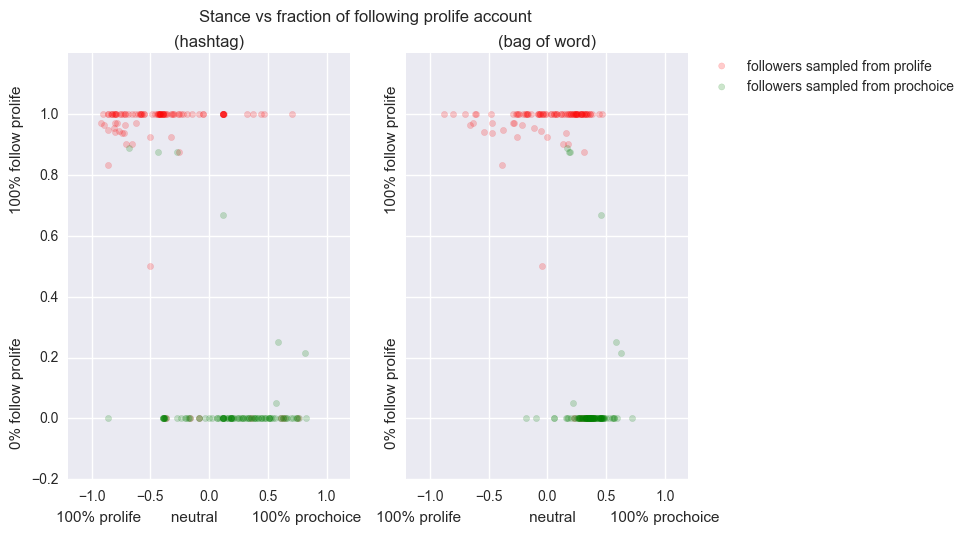

In [213]:

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(x=info_hashtag_df.loc[info_hashtag_df['follower of']==1, "stance"], 
            y=info_hashtag_df.loc[info_hashtag_df['follower of']==1, "prolife proportion"],
            alpha=0.2, color='r', label='followers sampled from prolife')
ax1.scatter(x=info_hashtag_df.loc[info_hashtag_df['follower of']==-1, "stance"], 
            y=info_hashtag_df.loc[info_hashtag_df['follower of']==-1, "prolife proportion"],
            alpha=0.2, color='g', label='followers sampled from prochoice')
ax1.set_title("(hashtag)")
ax1.set_xlabel("100% prolife       neutral        100% prochoice")
ax1.set_xlim([-1.2, 1.2])
ax1.set_ylim([-0.2, 1.2])
ax1.set_ylabel("0% follow prolife                             100% follow prolife")

ax2.scatter(x=info_df.loc[info_df['follower of']==1, "stance"], 
            y=info_df.loc[info_df['follower of']==1, "prolife proportion"],
            alpha=0.2, color='r', label='followers sampled from prolife')
ax2.scatter(x=info_df.loc[info_df['follower of']==-1, "stance"], 
            y=info_df.loc[info_df['follower of']==-1, "prolife proportion"],
            alpha=0.2, color='g', label='followers sampled from prochoice')
ax2.set_xlim([-1.2, 1.2])
ax1.set_ylim([-0.2, 1.2])
ax2.set_title("(bag of word)")
ax2.set_xlabel("100% prolife                neutral        100% prochoice")
ax2.set_ylabel("0% follow prolife                             100% follow prolife")
plt.suptitle("Stance vs fraction of following prolife account ")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

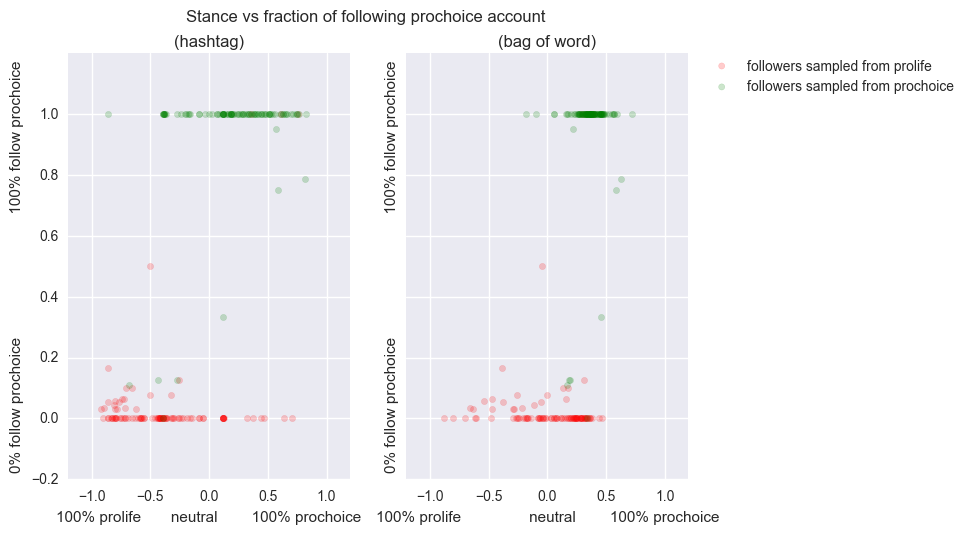

In [214]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(x=info_hashtag_df.loc[info_hashtag_df['follower of']==1, "stance"], 
            y=info_hashtag_df.loc[info_hashtag_df['follower of']==1, "prochoice proportion"],
            alpha=0.2, color='r', label='followers sampled from prolife')
ax1.scatter(x=info_hashtag_df.loc[info_hashtag_df['follower of']==-1, "stance"], 
            y=info_hashtag_df.loc[info_hashtag_df['follower of']==-1, "prochoice proportion"],
            alpha=0.2, color='g', label='followers sampled from prochoice')
ax1.set_title("(hashtag)")
ax1.set_xlabel("100% prolife       neutral        100% prochoice")
ax1.set_xlim([-1.2, 1.2])
ax1.set_ylim([-0.2, 1.2])
ax1.set_ylabel("0% follow prochoice                             100% follow prochoice")

ax2.scatter(x=info_df.loc[info_df['follower of']==1, "stance"], 
            y=info_df.loc[info_df['follower of']==1, "prochoice proportion"],
            alpha=0.2, color='r', label='followers sampled from prolife')
ax2.scatter(x=info_df.loc[info_df['follower of']==-1, "stance"], 
            y=info_df.loc[info_df['follower of']==-1, "prochoice proportion"],
            alpha=0.2, color='g', label='followers sampled from prochoice')
ax2.set_xlim([-1.2, 1.2])
ax1.set_ylim([-0.2, 1.2])
ax2.set_title("(bag of word)")
ax2.set_xlabel("100% prolife                neutral        100% prochoice")
ax2.set_ylabel("0% follow prochoice                             100% follow prochoice")
plt.suptitle("Stance vs fraction of following prochoice account ")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

--------
# Examine unusal individuals with hashtag countings

Individuals who have an extreme stance, e.g. above 0.5 or below -0.5 score, are considered to have more similarities with known prolife/prochoice group. That indicates they tweet in a manner that is similar to prolife/prochoice accounts do. This similarity is in perspective of context and the usage of hashtag. However, if some individuals have a high similarity with a specific group but are following a lot of the opposite group, that is considered to be "unusal" and those are the people we are interested in looking at.

In [215]:
# pick out people whose stance tends to be prochoice but follow more prolife than prochoice
prochoice_unusual_indiv_hashtag = info_hashtag_df_5.loc[info_hashtag_df_5["stance"]>0]\
                          .loc[info_hashtag_df_5["prochoice proportion"]<info_hashtag_df_5["prolife proportion"]]  

In [216]:
prochoice_unusual_indiv_hashtag

,account_name,predict_class,prochoice_strength,prolife_strength,follower of,prolife proportion,prochoice proportion,prolife cnt,prochoice cnt,total cnt,stance
8,AngelaFairbanks,0,0.707539,0.292461,1,1.0,0.0,14,0,14,0.707539
45,defenderofthe8,0,0.823784,0.176216,1,1.0,0.0,20,0,20,0.323784


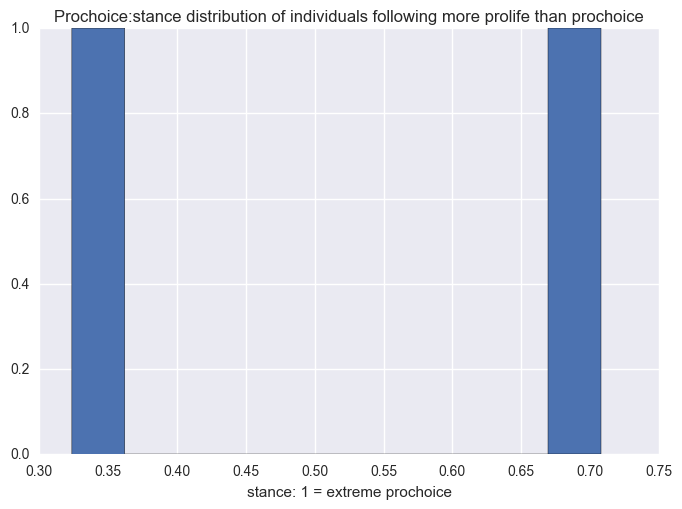

In [217]:
plt.hist(x=prochoice_unusual_indiv_hashtag["stance"])
plt.title("Prochoice:stance distribution of individuals following more prolife than prochoice")
plt.xlabel("stance: 1 = extreme prochoice")
plt.show()

In [218]:
# pick out people whose stance tends to be prolife but follow more prochoice than prolife
prolife_unusual_indiv_hashtag = info_hashtag_df_5.loc[info_hashtag_df_5["stance"]<0]\
                               .loc[info_hashtag_df_5["prochoice proportion"]>info_hashtag_df_5["prolife proportion"]]
prolife_unusual_indiv_hashtag

,account_name,predict_class,prochoice_strength,prolife_strength,follower of,prolife proportion,prochoice proportion,prolife cnt,prochoice cnt,total cnt,stance
12,Anthony13JJ,0,0.619885,0.380115,-1,0.0,1.0,0,9,9,-0.380115
32,ch7pg3,0,0.664252,0.335748,-1,0.0,1.0,0,8,8,-0.002415
115,littlemissevec,0,0.646805,0.353195,-1,0.0,1.0,0,7,7,-0.205047
179,The_Alma_D,0,0.624263,0.375737,-1,0.0,1.0,0,13,13,-0.035311


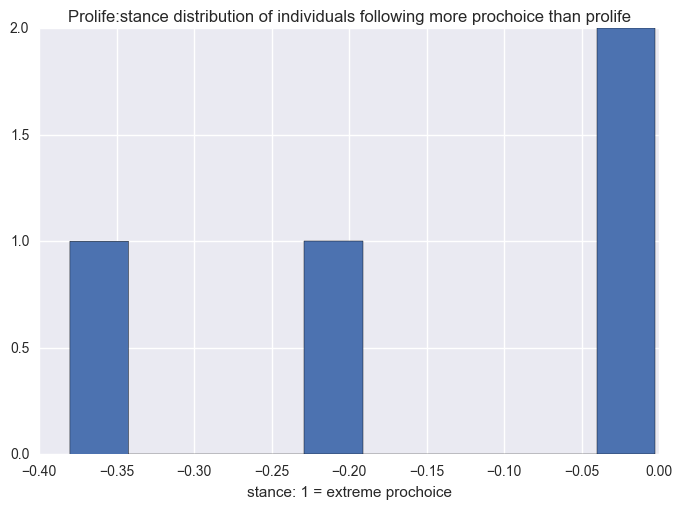

In [219]:
plt.hist(x=prolife_unusual_indiv_hashtag["stance"])
plt.title("Prolife:stance distribution of individuals following more prochoice than prolife")
plt.xlabel("stance: 1 = extreme prochoice")
plt.show()

--------
# Examine unusal individuals with bag-of-word countings

In [220]:
# pick out people whose stance tends to be prochoice but follow more prolife than prochoice
prochoice_unusual_indiv = info_df_5.loc[info_df_5["stance"]>0]\
                                 .loc[info_df_5["prochoice proportion"]<info_df_5["prolife proportion"]]  
prochoice_unusual_indiv

,account_name,predict_class,prochoice_strength,prolife_strength,follower of,prolife proportion,prochoice proportion,prolife cnt,prochoice cnt,total cnt,stance
2,Abigailschumach,0,0.662554,0.337446,1,1.000000,0.000000,13,0,13,0.247186
3,Alboteaparty,0,0.685805,0.314195,1,1.000000,0.000000,7,0,7,0.239477
8,AngelaFairbanks,0,0.598996,0.401004,1,1.000000,0.000000,14,0,14,0.029847
15,bakerbarb54130,0,0.639696,0.360304,1,1.000000,0.000000,7,0,7,0.166012
23,BrianChiasson,0,0.704924,0.295076,1,1.000000,0.000000,9,0,9,0.263930
33,Chuck_Swanson,0,0.649230,0.350770,1,1.000000,0.000000,14,0,14,0.195829
39,ConnieBII,0,0.620866,0.379134,1,1.000000,0.000000,11,0,11,0.075412
69,FriscoTx4Trump,0,0.705541,0.294459,1,1.000000,0.000000,14,0,14,0.288494
82,jackeekgonzalez,0,0.674990,0.325010,1,0.937500,0.062500,15,1,16,0.159409
94,JPAndreas1,0,0.673057,0.326943,1,1.000000,0.000000,7,0,7,0.256705


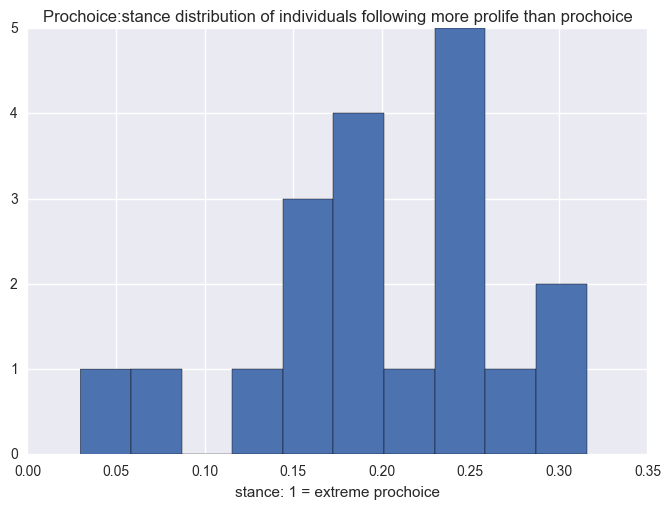

In [221]:
plt.hist(x=prochoice_unusual_indiv["stance"])
plt.title("Prochoice:stance distribution of individuals following more prolife than prochoice")
plt.xlabel("stance: 1 = extreme prochoice")
plt.show()

In [222]:
# pick out people whose stance tends to be prolife but follow more prochoice than prolife
prolife_unusual_indiv = info_df_5.loc[info_df_5["stance"]<0]\
                               .loc[info_df_5["prochoice proportion"]>info_df_5["prolife proportion"]]
prolife_unusual_indiv

,account_name,predict_class,prochoice_strength,prolife_strength,follower of,prolife proportion,prochoice proportion,prolife cnt,prochoice cnt,total cnt,stance
189,trianglescheme,1,0.452692,0.547308,-1,0.0,1.0,0,7,7,-0.176998


---
# Examine the hashtag/word vector for unusual individuals

In [223]:
data_path = 'hashtag_vec.mat'

data = sio.loadmat(data_path)
org_account_type = data['training_labels'].T
org_account_data = data['training_data'] 
indiv_account_data = data['individual_data'] 
indiv_account_order = data['individual_account_order'] 

hashtag_df = pd.DataFrame({
    'user': [s.strip() for s in indiv_account_order],
    'hashtag_vector': list(indiv_account_data)
})
print(hashtag_df.head())

info_hashtag_df_5_account_name = [s.strip() for s in info_hashtag_df_5['account_name']]

design_matrxi_hashtag = [hashtag_df['hashtag_vector'][i] for i in range(len(indiv_account_order))
                         if hashtag_df['user'][i] in info_hashtag_df_5_account_name]

design_matrxi_user = [hashtag_df['user'][i] for i in range(len(indiv_account_order))
                         if hashtag_df['user'][i] in info_hashtag_df_5_account_name]
file_dict = {
    'individual_account_order': design_matrxi_user,
    'data': design_matrxi_hashtag
}
sio.savemat('indiv_hashtag_vec_ls_5.mat', file_dict, do_compression=True)

final_stance_hashtag_ls_5=pd.DataFrame({
    'individual_account_order': info_hashtag_df_5_account_name,
    'stance': info_hashtag_df_5['stance']
})
final_stance_hashtag_ls_5.to_csv('indiv_final_stance_hashtag_ls_5.csv', sep=",", index=False)

                                      hashtag_vector             user
0  [70.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 28.0...     ABabysRights
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...    ABGYNservices
2  [12.0, 0.0, 1.0, 5.0, 0.0, 0.0, 0.0, 1.0, 0.0,...  Abigailschumach
3  [2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...     Alboteaparty
4  [3.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...      alexdelong_


In [224]:
data_path = 'word_vec.mat'

data = sio.loadmat(data_path)
org_account_type = data['training_labels'].T
org_account_data = data['training_data'] 
indiv_account_data = data['individual_data'] 
indiv_account_order = data['individual_account_order'] 

word_df = pd.DataFrame({
    'user': [s.strip() for s in indiv_account_order],
    'word_vector': list(indiv_account_data)
})
print(word_df.head())

info_df_5_account_name = [s.strip() for s in info_df_5['account_name']]

design_matrix_word = [word_df['word_vector'][i] for i in range(len(indiv_account_order))
                         if word_df['user'][i] in info_df_5_account_name]

design_matrix_user = [word_df['user'][i] for i in range(len(indiv_account_order))
                         if word_df['user'][i] in info_df_5_account_name]
file_dict = {
    'individual_account_order': design_matrix_user,
    'data': design_matrix_word
}
sio.savemat('indiv_word_vec_ls_5.mat', file_dict, do_compression=True)

final_stance_word_ls_5=pd.DataFrame({
    'individual_account_order': info_df_5_account_name,
    'stance': info_df_5['stance']
})
final_stance_word_ls_5.to_csv('indiv_final_stance_word_ls_5.csv', sep=",", index=False)

              user                                        word_vector
0     ABabysRights  [0.0, 4.0, 0.0, 1.0, 0.0, 7.0, 5.0, 0.0, 0.0, ...
1    ABGYNservices  [0.0, 13.0, 3.0, 11.0, 0.0, 0.0, 0.0, 14.0, 1....
2  Abigailschumach  [0.0, 7.0, 0.0, 12.0, 0.0, 4.0, 8.0, 22.0, 12....
3     Alboteaparty  [0.0, 3.0, 2.0, 15.0, 0.0, 0.0, 9.0, 17.0, 15....
4      alexdelong_  [0.0, 2.0, 1.0, 3.0, 0.0, 0.0, 5.0, 2.0, 6.0, ...


In [225]:
with open("select_word.csv") as f:
    words = [row["word"].strip() for row in DictReader(f)]

with open("select_hashtag.csv") as f:
    hashtags = [row["word"].strip() for row in DictReader(f)]

def get_hashtag_vec(user_name):
    result = []
    for n in hashtag_df.loc[hashtag_df['user']==user_name, 'hashtag_vector']:
        result.append(n)
    return result[0]

def get_word_vec(user_name):
    result = []
    for n in word_df.loc[word_df['user']==user_name, 'word_vector']:
        result.append(n)
    return result[0]

In [226]:
try:
    index = np.where(get_hashtag_vec('Abigailschumach') != 0)[0]
    for i in index:
        print(hashtags[i])
except IndexError:
    print("No hashtag in the tweets")

prolife
pregnancy
defundpp
catholic
scotus
praytoendabortion
protestpp
tcot
life
jesus
adoption
gopdebate
christian
usa
ccot
nevertrump
trump
obamacare
election2016
love
abortion
standwithpp
demsinphilly
blacklivesmatter
humanrights
plannedparenthood
tbt
nyc
texas
hr7


In [227]:
try:
    index = np.where(get_word_vec('Abigailschumach')!=0)[0]
    for i in index:
        print(words[i])
except IndexError:
    print("No word in the tweets")

abortions
anti
babies
baby
bill
black
born
care
catholic
check
child
children
choice
court
daily
days
death
defundpp
end
every
family
first
fund
funds
get
god
good
great
health
help
human
join
justice
know
legal
life
like
live
lives
love
make
mother
need
never
parenthood
people
planned
plannedparenthood
please
ppact
prayer
praying
pregnancy
president
pro
prolife
read
right
rights
rt
safe
saved
scotus
share
state
stories
story
support
texas
thank
think
unborn
us
video
vote
woman
women
work
world
years


In [228]:
info_hashtag_df.loc[info_df['account_name'] == 'defenderofthe8']

,account_name,predict_class,prochoice_strength,prolife_strength,follower of,prolife proportion,prochoice proportion,prolife cnt,prochoice cnt,total cnt,stance
45,defenderofthe8,0,0.823784,0.176216,1,1.0,0.0,20,0,20,0.323784


---
#### Distribution of the following proportion from individuals sampled from prolife group and prochoice group

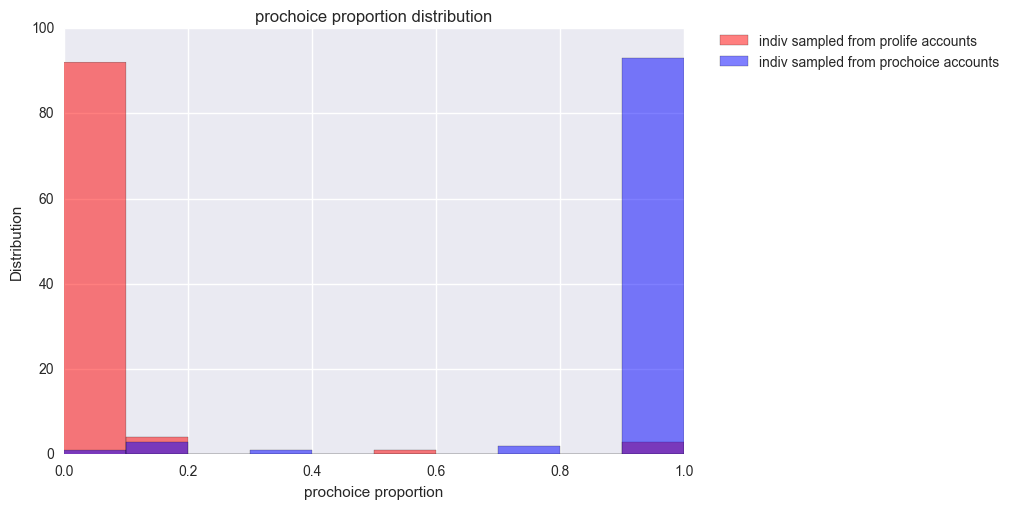

In [229]:
plt.hist(x=info_df.loc[info_df["follower of"]==1, "prochoice proportion"], color='r', alpha=0.5,
         label="indiv sampled from prolife accounts")
plt.hist(x=info_df.loc[info_df["follower of"]==-1, "prochoice proportion"], color='b', alpha=0.5,
         label="indiv sampled from prochoice accounts")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("Distribution")
plt.xlabel("prochoice proportion")
plt.title("prochoice proportion distribution")
plt.show()

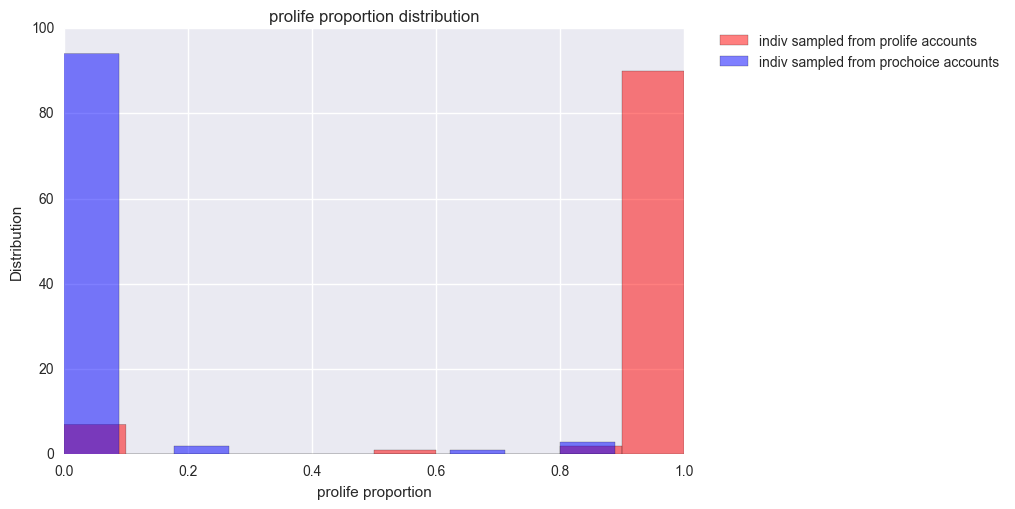

In [230]:
plt.hist(x=info_df.loc[info_df["follower of"]==1, "prolife proportion"], color='r', alpha=0.5,
         label="indiv sampled from prolife accounts")
plt.hist(x=info_df.loc[info_df["follower of"]==-1, "prolife proportion"], color='b', alpha=0.5,
         label="indiv sampled from prochoice accounts")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("Distribution")
plt.xlabel("prolife proportion")
plt.title("prolife proportion distribution")
plt.show()

In [199]:
proportion_ls_5_df = pd.DataFrame({
    "account name": info_df_5['account_name'],
    "prolife proportion": info_df_5['prolife proportion'],
    "prochoice proportion": info_df_5['prochoice proportion'],
    "prolife cnt": info_df_5["prolife cnt"],
    "prochoice cnt": info_df_5["prochoice cnt"],
    "total cnt": info_df_5["total cnt"]
})
proportion_ls_5_df.to_csv("indiv_proportion_ls_5.csv", sep=",", index=False)